# Compressible Boundary layer

## Equations

The compressible equations are given by:
$$
\begin{align}
 (Cf^{''})^{'} + ff^{''} &=0 \\
\left(\frac{C}{Pr}g_e^{'}\right)^{'} + fg_e^{'} + C\frac{u_e}{h_e}\left(f^{''}\right)^2 &=0
\end{align}
$$
With the boundary conditions:
$$f(0)=0,\quad f^{'}(0)=0,\quad g_e(0)=g_{e-w}$$
And the $Pr$ and $C$ given by:
$$
\begin{align}
Pr(g_e) &= \frac{\mu(g_e) c_p(g_e)} {k(g_e)} \\
C(g_e) &=\frac{\rho(g_e) \mu(g_e)}{\rho_e\rho_e} \\
\end{align}
$$

## Derivation ODE

Rewrite using product rule
\begin{align}
 Cf^{'''} + \left(C^{'}+ f\right)f^{''} &=0 \\
\frac{C}{Pr}g_e^{''}  + \left(\frac{C^{'}}{Pr} + C\left(\frac{1}{Pr}\right)^{'} + f \right)g_e^{'} + C\frac{u_e}{h_e}\left(f^{''}\right)^2 &=0
\end{align}
Further rewritten
$$ \frac{C}{Pr}g_e^{''}  + \left(\frac{C^{'}}{Pr} + \frac{C}{Pr^2}{Pr}^{'} + f \right)g_e^{'} + C\frac{u_e}{h_e}\left(f^{''}\right)^2 =0 $$

Define the following variables:
$$
\begin{align}
g &= f^{'}  \\
h &= g^{'}  \\
t &= g_e^{'}
\end{align}
$$

Pluggin into original equations gives:

\begin{align}
Ch^{'} + \left(C^{'}+f\right) h &= 0 \\
f' &= g \\
g' &= h \\
\frac{C}{Pr}t^{'}  + \left(\frac{C^{'}}{Pr} + \frac{C}{Pr^2}{Pr}^{'} + f \right)t + C\frac{u_e}{h_e}\left(h\right)^2 &=0 \\
g_e^{'} &= t
\end{align}

with
\begin{align}
C' &= \frac{1}{\rho_e \mu_e}\left(\rho^{'}\mu + \rho\mu^{'}\right) \\
Pr' &= \frac{1}{k}\left(\mu^{'}c_p + \mu c_p^{'} \right) - \frac{\mu c_p}{k^2} k^{'}
\end{align}



This gives the following ODEs to be solved

\begin{align}
h^{'} &=- \frac{\left(C^{'}+f\right)}{C} h  \\
f' &= g \\
g' &= h \\
t^{'}  &=- \left(\frac{C^{'}}{C} + \frac{1}{Pr}{Pr}^{'} + \frac{fPr}{C} \right)t - Pr\frac{u_e}{h_e}\left(h\right)^2 \\
g_e^{'} &= t
\end{align}



With:
$$
\begin{align}
C' &= \frac{1}{\rho_e \mu_e}\left(\rho^{'}\mu + \rho\mu^{'}\right) \\
Pr' &= \frac{1}{k}\left(\mu^{'}c_p + \mu c_p^{'} \right) - \frac{\mu c_p}{k^2} k^{'}
\end{align}
$$

## Numerical Method

$$
\begin{align}
h(x+\Delta x) &= h(x) -\frac{C^{'}+f(x)}{C}h(x)\Delta x& \\
f(x+\Delta x) &= f(x) +g(x)\Delta x&      \\
g(x+\Delta x) &= g(x) +h(x)\Delta x&      \\
t(x+\Delta x) &= t(x) -\left(\left(\frac{C^{'}}{C} + \frac{1}{Pr}{Pr}^{'} + \frac{fPr}{C} \right)t(x) + Pr\frac{u_e}{h_e}\left(h(x)\right)^2\right)\Delta x& \\
g_e(x+\Delta x)&= g_e(x)+t(x)\Delta x& \\
\end{align} 
$$


## Thermodynamic properties
$$
\begin{align}
Pr(g_e) &= \frac{\mu(g_e) c_p(g_e)} {k(g_e)} \\
C(g_e) &=\frac{\rho(g_e) \mu(g_e)}{\rho_e\mu_e} \\
C' &= \frac{1}{\rho_e \mu_e}\left(\rho^{'}\mu + \rho\mu^{'}\right) \\
Pr' &= \frac{1}{k}\left(\mu^{'}c_p + \mu c_p^{'} \right) - \frac{\mu c_p}{k^2} k^{'}
\end{align}
$$

In [458]:
import CoolProp.CoolProp as CP
class tstate(object):
    def __init__(self, fluid, ge0, p0):
        self.ge0 = ge0
        self.p0 = p0        
        self.BICU = CP.AbstractState("BICUBIC&HEOS", fluid)
        self.BICU2 = CP.AbstractState("BICUBIC&HEOS", fluid)
        self.delta = 1e-10
        self.set_zeroprop()
    
    def set_zeroprop(self):
        self.BICU.update(CP.HmassP_INPUTS,self.ge0,self.p0)  
        self.mu0 = self.BICU.viscosity() 
        self.rho0= self.BICU.rhomass() 
        
    def set_prop(self,ge,t):
        self.BICU. update(CP.HmassP_INPUTS,self.ge0*ge,self.p0)  
        self.BICU2.update(CP.HmassP_INPUTS,self.ge0*ge+self.delta,self.p0)  
        #properties
        self.rho= self.BICU.rhomass()
        self.mu = self.BICU.viscosity()
        self.cp = self.BICU.cpmass()
        self.k  = self.BICU.conductivity()
        self.Pr = self.mu*self.cp/self.k
        self.C = rho(ge)*mu(ge)/(rho0*mu0)
        #derivatives
        self.dercp = (self.BICU2.cpmass()- self.cp)     /self.delta
        self.derk =  (self.BICU2.conductivity()- self.k)/self.delta
        self.dermu = (self.BICU2.viscosity()- self.mu)  /self.delta
        self.derrho =(self.BICU2.rhomass()- self.rho)   /self.delta
        self.derPr = (1/(self.rho0*self.mu0))*(self.derrho*self.mu+self.rho*self.dermu)*t
        self.derC =  (1/self.k)*(self.dermu*self.cp+self.mu*self.dercp)*t - \
                     ((self.mu*self.cp)/(self.k**2))*self.derk*t
        
        


## Solve ODES

In [462]:
import numpy as np
n=100000
ge0 = 1e6
p0  = 2e6
ue = 10
he = 1
ts = tstate("CO2", ge0, p0)

#mesh
x = np.linspace(0,10,n); dx = np.diff(x)
#initialization
f = np.zeros(n); g = np.zeros(n); h = np.zeros(n)
ge = np.zeros(n); t = np.zeros(n)
#bc
f[0]=0; g[0]=0; ge[0]=0.9
#initial guess
h[0]=0.5; dh=0.2
t[0]=0.1; dt=0.2

#solve the odes 
error=0
niter=0    
while niter < 1000:
    for i in range(0,n-1):
        ip=i+1
        ts.set_prop(ge[i], t[i])
        h[ip]=h[i]  -((ts.derC + f[i])/ts.C)*h[i]*dx[i]
        f[ip]=f[i] + g[i]*dx[i]
        g[ip]=g[i] + h[i]*dx[i]
        t[ip]=t[i] -((ts.derC/ts.C+ts.derPr/ts.Pr+ \
                      (f[i]*ts.Pr)/ts.C)*t[i]+ts.Pr*h[i]**2)*dx[i]
        ge[ip]=ge[i]+t[i]*dx[i]
    niter+=1
    
    #update bc
    if (g[-1] < 1.0):
        h[0] = h[0] + dh;
    else:
        h[0] = h[0] - dh;
        dh = dh/1.01;
        h[0] = h[0] + dh;
        
    if (ge[-1] < 1.0):
        t[0] = t[0] + dt;
    else:
        t[0] = t[0] - dt;
        dt = dt/1.01;
        t[0] = t[0] + dt;
        
    #calc error
    error = abs(1-g[-1])+abs(1-ge[-1])
    print(error,g[-1],dh,ge[-1],dt)

0.4057068804830687 1.0633594518951894 0.19801980198019803 0.6576525714121207 0.2
0.1672993885628502 1.0272109289414504 0.19605920988138417 1.1400884596213998 0.19801980198019803
0.1634341182177963 1.0246242744400627 0.19411802958552887 1.1388098437777336 0.19605920988138417
0.15959304385193285 1.022059594003281 0.19219606889656324 1.1375334498486518 0.19411802958552887
0.1557765466229093 1.0195171363328133 0.19029313752134974 1.136259410290096 0.19219606889656324
0.15198456538211436 1.016996724549608 0.18840904705084133 1.1349878408325063 0.19029313752134974
0.14821703710919 1.0144981826864694 0.18654361094142705 1.1337188544227206 0.18840904705084133
0.14447389689108792 1.0120213356417591 0.18469664449646242 1.1324525612493288 0.18654361094142705
0.14075507798131337 1.0095660087844378 0.1828679648479826 1.1311890691968756 0.18469664449646242
0.13706049975394596 1.0071319981696807 0.18105739093859663 1.1299285015842653 0.1828679648479826
0.13339006280425836 1.0047190932655312 0.1792647

0.28492061438191096 1.111760336953404 0.0849947009834283 1.173160277428507 0.0858446479932626
0.2834281955553244 1.1106849139443655 0.08415316929052308 1.1727432816109589 0.0849947009834283
0.28194841502000956 1.1096196213319374 0.0833199695945773 1.1723287936880722 0.08415316929052308
0.28048118454181625 1.108564367383569 0.08249501940057158 1.1719168171582472 0.0833199695945773
0.2790264161602656 1.1075190611382457 0.08167823703026889 1.1715073550220199 0.08249501940057158
0.27758402216928024 1.1064836124038575 0.08086954161412761 1.1711004097654227 0.08167823703026889
0.27615391517730825 1.1054579317435678 0.08006885308329467 1.1706959834337405 0.08086954161412761
0.274736008043845 1.1044419304710602 0.07927609216167789 1.1702940775727848 0.08006885308329467
0.27333021392920487 1.1034355206409807 0.07849118035809692 1.1698946932882242 0.07927609216167789
0.27193644627766145 1.102438615044948 0.0777140399585118 1.1694978312327136 0.07849118035809692
0.2705546188414891 1.1014511272018

KeyboardInterrupt: 

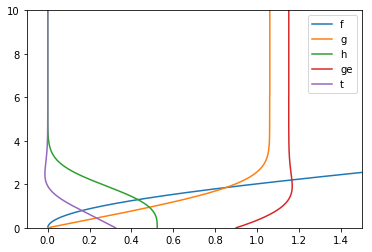

In [466]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots()
ax.plot(f, x,label='f')
ax.plot(g, x,label='g')
ax.plot(h, x,label='h')
ax.plot(ge, x,label='ge')
ax.plot(t, x,label='t')
ax.set_xbound(-.1,1.5)
ax.set_ybound(0,10)
ax.legend()
plt.savefig("blasius_vp.png")

## Store solution

In [464]:
import pandas as pd
df = pd.DataFrame(np.array([x,f,g,h,ge,t]).T,columns=['x','f','g','h','ge','t'])
df.to_csv("blasius_vp.csv",index=None, sep="\t", header=True)